# Introduction to Clustering: K means coding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


## Data Standardization

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


## Finding optimal number of clusters using ELBOW method

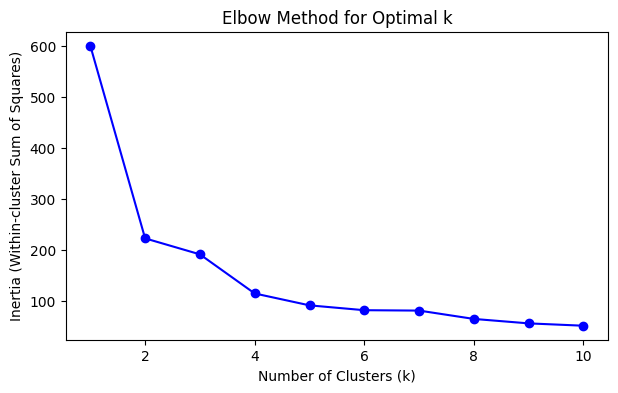

In [4]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

## k-means : K=3

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_data)

## Adding cluster labels

In [6]:
df['Cluster'] = labels
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        2  
2        2  
3        2  
4        1  


## Visualize clusters using PCA

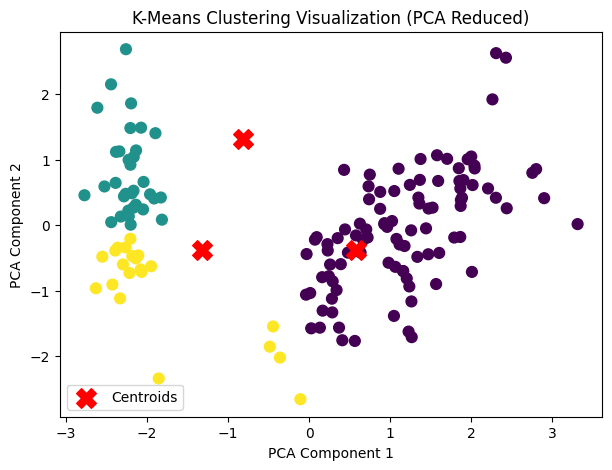

In [7]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(7, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering Visualization (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


## Analyzing Cluster cahracterstics

In [9]:
print("Cluster-wise feature means:")
print(df.groupby('Cluster').mean())

Cluster-wise feature means:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 6.314583          2.895833           4.973958   
1                 5.169697          3.630303           1.493939   
2                 4.747619          2.895238           1.757143   

         petal width (cm)  
Cluster                    
0                1.703125  
1                0.272727  
2                0.352381  
